In [4]:
import pandas as pd
df = pd.read_csv("C:/Users/bapti/Downloads/ML-project-/T1.csv", parse_dates=["Date/Time"], dayfirst=True)
print(df.head())

            Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2018-01-01 00:00:00           380.047791          5.311336   
1 2018-01-01 00:10:00           453.769196          5.672167   
2 2018-01-01 00:20:00           306.376587          5.216037   
3 2018-01-01 00:30:00           419.645905          5.659674   
4 2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  


# DATA VIZUALISATION

First few rows:
             Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2018-01-01 00:00:00           380.047791          5.311336   
1 2018-01-01 00:10:00           453.769196          5.672167   
2 2018-01-01 00:20:00           306.376587          5.216037   
3 2018-01-01 00:30:00           419.645905          5.659674   
4 2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/

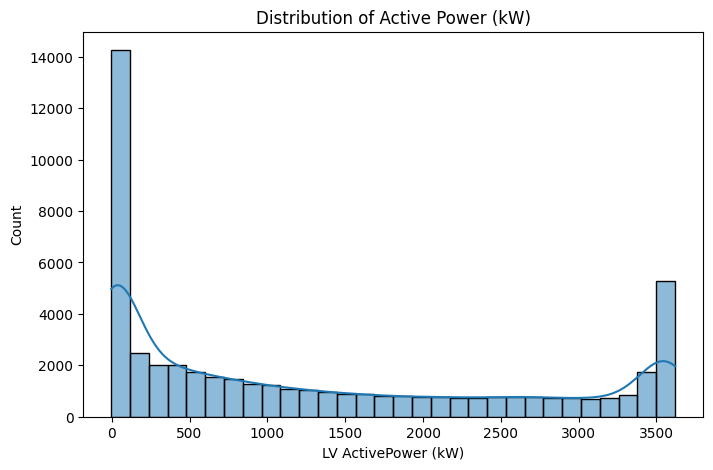

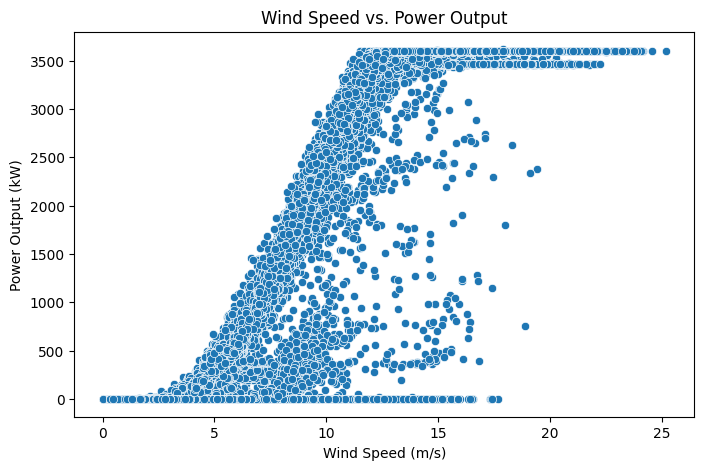

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/bapti/Downloads/ML-project-/T1.csv", parse_dates=["Date/Time"], dayfirst=True)

# Quick overview of the dataset
print("First few rows:\n", df.head())

# Check data types and missing values
print("\nDataset info:\n")
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Summary statistics
print("\nDataset statistics:\n", df.describe())

# Visualizing the distribution of power output
plt.figure(figsize=(8,5))
sns.histplot(df["LV ActivePower (kW)"], bins=30, kde=True)
plt.title("Distribution of Active Power (kW)")
plt.show()

# Relationship between wind speed and power output
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Wind Speed (m/s)"], y=df["LV ActivePower (kW)"])
plt.title("Wind Speed vs. Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.show()


# DATA CLEANING

In [5]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df = df.dropna()

# Select features (independent variables) and target variable
X = df[["Wind Speed (m/s)", "Wind Direction (°)", "Theoretical_Power_Curve (KWh)"]]
y = df["LV ActivePower (kW)"]

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

Training data size: (40424, 3)
Test data size: (10106, 3)


# Train and Compare Models

Model 1: Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}")
print(f"Linear Regression - R²: {r2:.2f}")


Linear Regression - MSE: 169505.14
Linear Regression - R²: 0.90


Model 2: Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")


Random Forest - MSE: 170549.59
Random Forest - R²: 0.90


Model 3: Gradient Boosting Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# Compare all models
print("\nUpdated Model Comparison:")
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")


Gradient Boosting - MSE: 146729.38, R²: 0.91

Updated Model Comparison:
Linear Regression - MSE: 169505.14, R²: 0.90
Random Forest - MSE: 170549.59, R²: 0.90
Gradient Boosting - MSE: 146729.38, R²: 0.91


In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Normalize features for better NN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer="adam", loss="mse")

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate performance
nn_mse = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network - MSE: {nn_mse:.2f}")


C:\Users\bapti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1231092.8750 - val_loss: 168499.8750
Epoch 2/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 161215.7344 - val_loss: 164204.7656
Epoch 3/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 167100.1094 - val_loss: 163784.2969
Epoch 4/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 168253.8594 - val_loss: 163682.0000
Epoch 5/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 157191.8906 - val_loss: 163039.0156
Epoch 6/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 152754.3906 - val_loss: 161152.2344
Epoch 7/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 160618.3594 - val_loss: 160509.0312
Epoch 8/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 153694.8281 - val_loss: 161349.0000
Epoch 9/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 158711.3906 - val_loss: 161906.2812
Epoch 10/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 150154.2031 - val_loss: 158818.3906
Epoch 11/50
1264/1

Comparaison between models

316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network - R²: 0.91


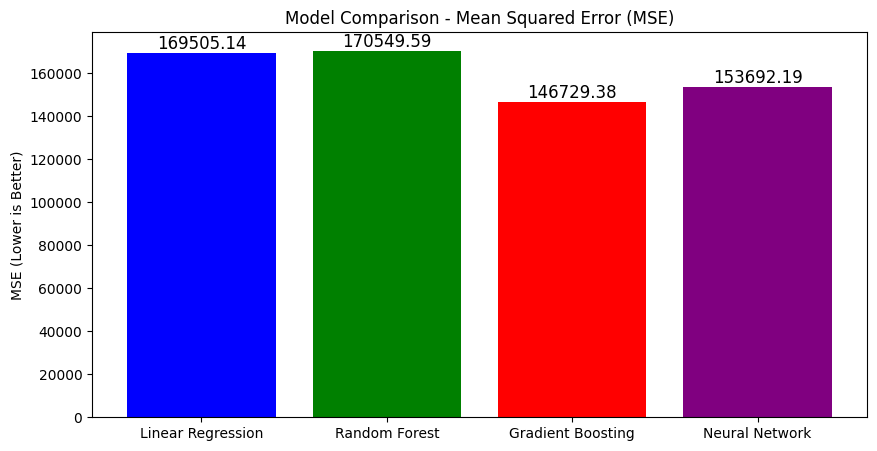

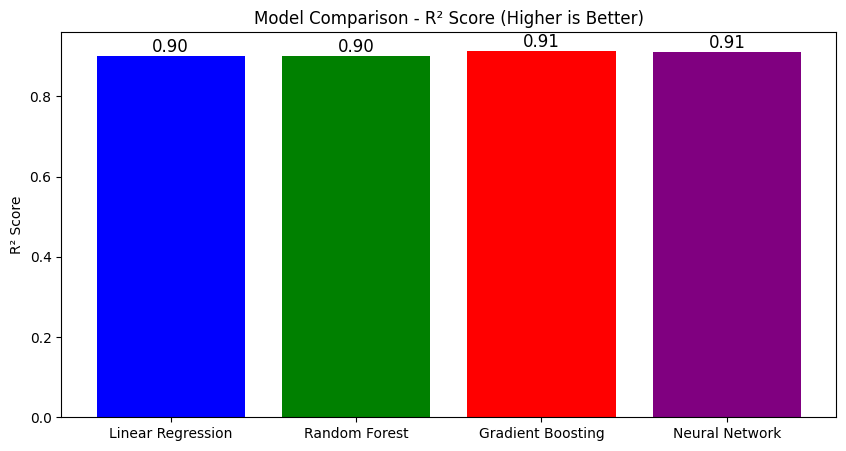

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Compute predictions for the neural network
y_pred_nn = nn_model.predict(X_test_scaled).flatten()  # Ensure shape is correct

# Compute R² for Neural Network
ss_res = np.sum((y_test - y_pred_nn) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_nn = 1 - (ss_res / ss_tot)

print(f"Neural Network - R²: {r2_nn:.2f}")

# Store model names and results
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "Neural Network"]
mse_values = [mse, mse_rf, mse_gb, nn_mse]
r2_values = [r2, r2_rf, r2_gb, r2_nn]

# Plot MSE Comparison
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.ylabel("MSE (Lower is Better)")

# Add values on top of bars
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()

# Plot R² Score Comparison
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red', 'purple'])
plt.title("Model Comparison - R² Score (Higher is Better)")
plt.ylabel("R² Score")

# Add values on top of bars
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()



Optimisaton : Finding best wind conditions for maximum power

In [17]:
import numpy as np

# Generate wind conditions
wind_speeds = np.linspace(df["Wind Speed (m/s)"].min(), df["Wind Speed (m/s)"].max(), 50)
wind_directions = np.linspace(df["Wind Direction (°)"].min(), df["Wind Direction (°)"].max(), 50)

# Create grid
grid = np.array(np.meshgrid(wind_speeds, wind_directions)).T.reshape(-1, 2)

# Predict power output for each combination
grid_df = pd.DataFrame(grid, columns=["Wind Speed (m/s)", "Wind Direction (°)"])
grid_df["Theoretical_Power_Curve (KWh)"] = np.mean(df["Theoretical_Power_Curve (KWh)"])

# Predict using Random Forest
grid_df["Predicted Power (kW)"] = rf_model.predict(grid_df)

# Find the best wind speed and direction
optimal_conditions = grid_df.loc[grid_df["Predicted Power (kW)"].idxmax()]
print("Optimal Wind Conditions for Maximum Power Generation:")
print(optimal_conditions)


Optimal Wind Conditions for Maximum Power Generation:
Wind Speed (m/s)                   12.345801
Wind Direction (°)                352.650700
Theoretical_Power_Curve (KWh)    1492.175463
Predicted Power (kW)             1715.284745
Name: 1248, dtype: float64
